In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install ipython-autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


In [ ]:
!pip3 install spacy==3.2.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.9
    Uninstalling pydantic-1.10.9:
      Successfully uninstalled pydantic-1.10.9
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.10
    Uninstalling thinc-8.1.10:
      Successfully uninstalled thinc-8.1.10
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.3
    Uninstalling spacy-3.5.3:
      Successfully uninstalled spacy-3.5

In [ ]:
%load_ext autotime
import pandas as pd
import numpy as np
# import pickle5 as pickle
import re
from tqdm.notebook import tqdm
tqdm.pandas()

import re
def tag_cleaner(row):
  row = re.sub('@','',row)
  row = re.sub('\++','+',row)
  row = re.sub('-+','-',row)
  row = re.sub('/',' ',row)
  row = re.sub('%','',row)
  row = re.sub('[a-z]','',row)
  return row

time: 850 ms (started: 2023-06-30 11:25:07 +00:00)


In [ ]:
!pip3 install https://github.com/UCREL/pymusas-models/releases/download/en_dual_none_contextual-0.3.1/en_dual_none_contextual-0.3.1-py3-none-any.whl
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.6/917.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
2023-06-30 11:25:39.716492: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 11:25:41.580669: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl#egg=en_core_web_sm==3.2.0 contains an egg f

In [ ]:
import spacy

# We exclude the following components as we do not need them.
nlp = spacy.load('en_core_web_sm', exclude=['parser', 'ner'])
# Load the English PyMUSAS rule based tagger in a separate spaCy pipeline
# nlp.enable_pipe
english_tagger_pipeline = spacy.load('en_dual_none_contextual')
# Adds the English PyMUSAS rule based tagger to the main spaCy pipeline
nlp.add_pipe('pymusas_rule_based_tagger', source=english_tagger_pipeline)

time: 17.7 s (started: 2023-06-30 11:25:58 +00:00)


In [ ]:
output=nlp('hi. you are dumb')
for token in output:
            print({'Token': token.text,
                                 'Lemma': token.lemma_,
                                 'UPOS': token.pos_,
                                 'USAS Tags': token._.pymusas_tags})

{'Token': 'hi', 'Lemma': 'hi', 'UPOS': 'INTJ', 'USAS Tags': ['Z4']}
{'Token': '.', 'Lemma': '.', 'UPOS': 'PUNCT', 'USAS Tags': ['PUNCT']}
{'Token': 'you', 'Lemma': 'you', 'UPOS': 'PRON', 'USAS Tags': ['Z8mf']}
{'Token': 'are', 'Lemma': 'be', 'UPOS': 'AUX', 'USAS Tags': ['A3+', 'Z5']}
{'Token': 'dumb', 'Lemma': 'dumb', 'UPOS': 'ADJ', 'USAS Tags': ['X3.2-', 'X9.1-', 'S1.2.6-']}
time: 61.2 ms (started: 2023-06-30 11:26:18 +00:00)


In [ ]:
def get_usas_tags(text_x):
    output=nlp(text_x)
    all_tags=[]
    for token in output:
       all_tags.append(" ".join(token._.pymusas_tags))
    return " ".join(all_tags)

def get_usas_tags_demo(text_x):
    output=nlp(text_x)
    for token in output:
                print({'Token': token.text,
                                    'Lemma': token.lemma_,
                                    'UPOS': token.pos_,
                                    'USAS Tags': token._.pymusas_tags})

time: 938 µs (started: 2023-06-30 11:26:26 +00:00)


In [ ]:
get_usas_tags('hi you are dumb')

'Z4 Z8mf A3+ Z5 X3.2- X9.1- S1.2.6-'

time: 46.3 ms (started: 2023-06-30 11:26:29 +00:00)


# Get USAS Tags

In [ ]:
my_dir = '/content/drive/MyDrive/Discord-Reddit/'

time: 546 µs (started: 2023-06-30 11:32:48 +00:00)


In [ ]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']
# community_names = ['Ukrainian']
community_names = ['europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']
for community_name in community_names:
  merged_data = pd.read_excel(my_dir+f'Datasets/Clustered_Data/{community_name}_clustered.xlsx')
  print(f'for {community_name}:')
  merged_data['USAS_Tags'] = merged_data.progress_apply(lambda x: get_usas_tags(str(x['content'])), axis=1)
  merged_data.to_excel(my_dir+f'Datasets/Clustered_Data/{community_name}_clustered.xlsx',index=None)

FileNotFoundError: ignored

time: 109 ms (started: 2023-06-30 11:34:58 +00:00)


# Aggregate USAS Tags

In [ ]:
my_dir = '/content/drive/MyDrive/Discord-Reddit/'

time: 731 µs (started: 2022-11-30 11:20:31 +00:00)


In [ ]:
# community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
#  'dankmemes','Games','kpop','music','rickandmorty']#,'Writingprompts']
# community_names = ['Ukrainian']
# for community_name in community_names:
#   merged_data = pd.read_excel(my_dir+f'Datasets/Clustered_Data/{community_name}_clustered.xlsx')
#   print(f'for {community_name}:')
#   merged_data['USAS_Tags'] = merged_data.progress_apply(lambda x: get_usas_tags(x['content']), axis=1)
#   merged_data.to_excel(my_dir+f'Datasets/Clustered_Data/{community_name}_clustered.xlsx',index=None)

for Ukrainian:


  0%|          | 0/55690 [00:00<?, ?it/s]

time: 34min 14s (started: 2022-11-11 17:09:51 +00:00)


In [ ]:
from collections import Counter

usas_tags=pd.read_csv('https://ucrel.lancs.ac.uk/usas/semtags_subcategories.txt',sep='\t', header=None, encoding='cp1252').rename({0:'tag', 1:'description'}, axis=1)
usas_tags['nums']=0
base_tags_counter = Counter(dict((zip(usas_tags.tag, usas_tags.nums))))
usas_tags = dict(zip(usas_tags.tag, usas_tags.description.str.strip()))
usas_tags

{'A1': 'General And Abstract Terms',
 'A1.1.1': 'General actions / making',
 'A1.1.1-': 'Inaction',
 'A1.1.2': 'Damaging and destroying',
 'A1.1.2-': 'Fixing and mending',
 'A1.2': 'Suitability',
 'A1.2+': 'Suitable',
 'A1.2-': 'Unsuitable',
 'A1.3': 'Caution',
 'A1.3+': 'Cautious',
 'A1.3-': 'No caution',
 'A1.4': 'Chance, luck',
 'A1.4+': 'Lucky',
 'A1.4-': 'Unlucky',
 'A1.5': 'Use',
 'A1.5.1': 'Using',
 'A1.5.1+': 'Used',
 'A1.5.1-': 'Unused',
 'A1.5.2': 'Usefulness',
 'A1.5.2+': 'Useful',
 'A1.5.2-': 'Useless',
 'A1.6': 'Concrete/Abstract',
 'A1.7+': 'Constraint',
 'A1.7-': 'No constraint',
 'A1.8+': 'Inclusion',
 'A1.8-': 'Exclusion',
 'A1.9': 'Avoiding',
 'A1.9-': 'Unavoidable',
 'A2': 'Affect',
 'A2.1': 'Modify, change',
 'A2.1+': 'Change',
 'A2.1-': 'No change',
 'A2.2': 'Cause&Effect/Connection',
 'A2.2+': 'Cause/Effect/Connected',
 'A2.2-': 'Unconnected',
 'A3': 'Being',
 'A3+': 'Existing',
 'A3-': 'Non-existing',
 'A4': 'Classification',
 'A4.1': 'Generally kinds, groups, ex

time: 585 ms (started: 2022-11-30 11:24:11 +00:00)


time: 1.96 ms (started: 2022-11-23 13:53:38 +00:00)


In [ ]:
merged_data = pd.read_excel(my_dir+f'Datasets/Clustered_Data/Ukrainian_clustered.xlsx')

merged_data['USAS_Tags_cleaned']=merged_data['USAS_Tags'].map(tag_cleaner)
merged_data['USAS_Tags_Counter']=merged_data['USAS_Tags_cleaned'].map(lambda x: Counter(x.split(' ')))

time: 5.81 s (started: 2022-11-30 11:24:17 +00:00)


In [ ]:
merged_data

,Unnamed: 0,content,platform,cluster,cluster_label,proportion_of_reddit,USAS_Tags,USAS_Tags_cleaned,USAS_Tags_Counter
0,39556,their air support comes in twice a week. helic...,discord,171,going_shit_air_drones,0.575758,Z8 M5 M5 M1 N3.1 A2.2 A3+ X2.1 A9+ S4 N4 S3.2 ...,Z8 M5 M5 M1 N3.1 A2.2 A3+ X2.1 A9+ S4 N4 S3.2 ...,"{'Z8': 1, 'M5': 4, 'M1': 3, 'N3.1': 1, 'A2.2':..."
1,171703,remember when kim said he was going to nuke au...,discord,106,nuke_nukes_war,0.451456,X2.2+ Z5 Z99 A5.4+ A5.4+ A3+ Z5 T1.1.3 T1.1.3 ...,X2.2+ Z5 Z99 A5.4+ A5.4+ A3+ Z5 T1.1.3 T1.1.3 ...,"{'X2.2+': 1, 'Z5': 2, 'Z99': 1, 'A5.4+': 2, 'A..."
2,152506,"tell him you will break into his house, take o...",discord,-1,fuck_shit_people,0.496715,A5.4+ A5.4+ Z8mf T1.1.3 A1.1.2 A1.1.1 A1.9 S5-...,A5.4+ A5.4+ Z8 T1.1.3 A1.1.2 A1.1.1 A1.9 S5- T...,"{'A5.4+': 18, 'Z8': 12, 'T1.1.3': 5, 'A1.1.2':..."
3,283974,"you people are hopeless, bye",discord,-1,fuck_shit_people,0.496715,Z8mf S2mfc A3+ Z5 X2.6- E4.1- X9.2- A5.1- PUNC...,Z8 S2 A3+ Z5 X2.6- E4.1- X9.2- A5.1- PUNCT Z4,"{'Z8': 1, 'S2': 1, 'A3+': 1, 'Z5': 1, 'X2.6-':..."
4,226206,what’s with russian authoritarians and having ...,discord,-1,fuck_shit_people,0.496715,Z8 Z5 Z99 Z5 Z2 Z2/Q3 S7.1+ Z5 A9+ Z5 A2.2 S4 ...,Z8 Z5 Z99 Z5 Z2 Z2 Q3 S7.1+ Z5 A9+ Z5 A2.2 S4 ...,"{'Z8': 1, 'Z5': 5, 'Z99': 2, 'Z2': 2, 'Q3': 1,..."
...,...,...,...,...,...,...,...,...,...
19905,2131005,"they look so... fake? like, they look like dol...",reddit,-1,fuck_shit_people,0.496715,Z8mfn A8 X3.4 X2.4 X7+ Z4 Z5 A13.3 PUNCT A5.4-...,Z8 A8 X3.4 X2.4 X7+ Z4 Z5 A13.3 PUNCT A5.4- PU...,"{'Z8': 5, 'A8': 2, 'X3.4': 2, 'X2.4': 2, 'X7+'..."
19906,496546,russians are just pissed cause of mariupol in ...,reddit,30,said_azov_battalion,0.256410,Z99 A3+ Z5 A14 T3--- T1.3- N3.3--- B1 A2.2 X2....,Z99 A3+ Z5 A14 T3- T1.3- N3.3- B1 A2.2 X2.1 X4...,"{'Z99': 5, 'A3+': 2, 'Z5': 18, 'A14': 1, 'T3-'..."
19907,1193758,send his case to the hague to charge him offic...,reddit,70,send_ukrainians_ukraine_dude,0.615385,A5.4+ A5.4+ A4.1 O2 G2.1 B3 X4.1 Q3 Z5 Z5 Z99 ...,A5.4+ A5.4+ A4.1 O2 G2.1 B3 X4.1 Q3 Z5 Z5 Z99 ...,"{'A5.4+': 8, 'A4.1': 1, 'O2': 1, 'G2.1': 1, 'B..."
19908,1337960,give me an actual convincing reason why we sho...,reddit,-1,fuck_shit_people,0.496715,A5.4+ A5.4+ Z5 A5.4+ A14 A7+ A2.2 X2.1 A2.2 Z8...,A5.4+ A5.4+ Z5 A5.4+ A14 A7+ A2.2 X2.1 A2.2 Z8...,"{'A5.4+': 3, 'Z5': 4, 'A14': 1, 'A7+': 2, 'A2...."


time: 87.8 ms (started: 2022-11-30 11:24:34 +00:00)


# Tags per Cluster

In [ ]:
# reddit_x = pd.read_csv(my_dir + f"Datasets/discord/Ukrainian_discord_hate.csv")
# reddit_x[reddit_x['content'].duplicated()==False]
# reddit_x=reddit_x[reddit_x['author']!=0]
# reddit_x=reddit_x[reddit_x['author']!='AutoModerator']
# reddit_x[reddit_x['comment_text'].duplicated()]
# reddit_x[reddit_x['author_username'].str.contains('sn')]
# reddit_x[reddit_x['comment_text']=='do they really want to live in a country without coca cola']

time: 504 µs (started: 2022-11-15 18:02:12 +00:00)


In [ ]:
clusters_info = merged_data[['cluster','cluster_label','proportion_of_reddit']].drop_duplicates().sort_values(by='cluster').reset_index(drop=True)

time: 31.5 ms (started: 2022-11-30 11:25:30 +00:00)


In [ ]:
merged_data

In [ ]:
cluster_tags_dict=merged_data.groupby('cluster')['USAS_Tags_Counter'].sum().to_dict()
cluster_size_dict=merged_data.groupby('cluster')['content'].count().to_dict()

time: 2.73 s (started: 2022-11-30 11:25:34 +00:00)


In [ ]:
base_tags_counter.copy()

In [ ]:
def counter_updator(counter_x, counter_base = base_tags_counter):
  counter_base_=counter_base.copy()
  counter_base_.update(counter_x)
  return counter_base_

clusters_info['USAS_Tags']=clusters_info['cluster'].apply(lambda x: counter_updator(counter_x = cluster_tags_dict[x], counter_base = base_tags_counter))
clusters_info['size']=clusters_info['cluster'].map(cluster_size_dict)

time: 28.5 ms (started: 2022-11-30 11:25:38 +00:00)


In [ ]:
clusters_info['USAS_Tags'].map(len)

0      473
1      453
2      454
3      453
4      454
      ... 
467    460
468    456
469    455
470    463
471    455
Name: USAS_Tags, Length: 472, dtype: int64

time: 7.86 ms (started: 2022-11-15 18:14:15 +00:00)


In [ ]:
clusters_info

,cluster,cluster_label,proportion_of_reddit,USAS_Tags,size
0,-1,know_shit_people_war,0.519687,"{'A1': 0, 'A1.1.1': 31145, 'A1.1.1-': 418, 'A1...",35658
1,0,looks_link_amp_concerns,1.000000,"{'A1': 0, 'A1.1.1': 0, 'A1.1.1-': 0, 'A1.1.2':...",28
2,1,fuck_bone_putins_spineless,0.105263,"{'A1': 0, 'A1.1.1': 4, 'A1.1.1-': 0, 'A1.1.2':...",19
3,2,gaius_gaius_strikes,0.052632,"{'A1': 0, 'A1.1.1': 2, 'A1.1.1-': 0, 'A1.1.2':...",19
4,3,kissinger_genocide_war_time,0.560000,"{'A1': 0, 'A1.1.1': 16, 'A1.1.1-': 0, 'A1.1.2'...",25
...,...,...,...,...,...
467,466,want_nato_people_country,0.595745,"{'A1': 0, 'A1.1.1': 242, 'A1.1.1-': 2, 'A1.1.2...",235
468,467,going_weapons_ukraine,0.764706,"{'A1': 0, 'A1.1.1': 112, 'A1.1.1-': 0, 'A1.1.2...",51
469,468,invaded_ukraine_war,0.571429,"{'A1': 0, 'A1.1.1': 26, 'A1.1.1-': 0, 'A1.1.2'...",21
470,469,going_ukraine_war,0.744417,"{'A1': 0, 'A1.1.1': 1111, 'A1.1.1-': 7, 'A1.1....",403


time: 37 ms (started: 2022-11-15 18:29:00 +00:00)


In [ ]:
merged_data[merged_data['cluster']==1]

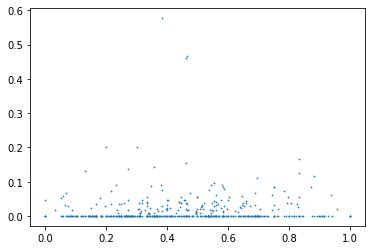

time: 141 ms (started: 2022-11-17 17:20:10 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots()

ax.scatter(clusters_info['proportion_of_reddit'], clusters_info['USAS_Tags'].apply(lambda x: x['S1.2.4-'])/clusters_info['size'], s=0.5)

# ax.set(ylim=(0, 0.2))

plt.show()

# Tags per Platform

In [ ]:
def counter_updator(counter_x, counter_base = base_tags_counter):
  counter_base_=counter_base.copy()
  counter_base_.update(counter_x)
  return counter_base_

def get_description_key(tags_dict_x):
  description_key={}
  for key_x in tags_dict_x:
    try:
      description_key[usas_tags[key_x]] = tags_dict_x[key_x]
    except:
      pass
  return description_key

# unwanted_tags = ['Grammatical bin','Pronouns', 'Unmatched','Existing']
# for tag_x in unwanted_tags:
#   try:
#     del reddit_tags[tag_x]
#     del discord_tags[tag_x]
#   except:
#     pass

time: 2.06 ms (started: 2022-11-30 13:54:50 +00:00)


In [ ]:
platforms_info

,USAS_Tags_Counter,USAS_Description_Dict
platform,,
discord,"{'A1': 0, 'A1.1.1': 2871, 'A1.1.1-': 19, 'A1.1...","{'General And Abstract Terms': 0, 'General act..."
reddit,"{'A1': 0, 'A1.1.1': 12141, 'A1.1.1-': 61, 'A1....","{'General And Abstract Terms': 0, 'General act..."


time: 82.1 ms (started: 2022-11-30 11:26:47 +00:00)


# Tags Difference

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import imageio

reddit_mask = imageio.imread(my_dir+'Charts/Reddit Mask.png')
discord_mask = imageio.imread(my_dir+'Charts/Discord Mask.png')

time: 31.9 ms (started: 2022-11-30 13:54:54 +00:00)


In [ ]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']

time: 1.2 ms (started: 2022-11-30 13:55:27 +00:00)


In [ ]:
# community_x='Ukrainian'
# community_x = 'Overwatch'
community_x = 'europe'



time: 14.3 s (started: 2022-11-30 11:26:24 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


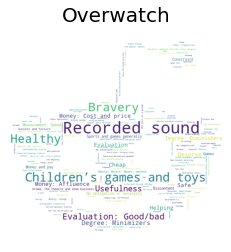

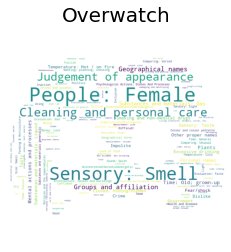

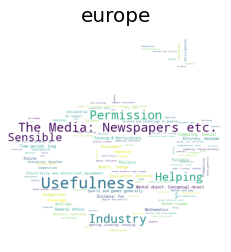

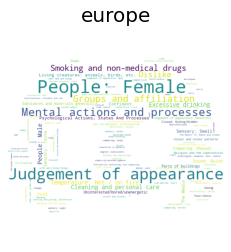

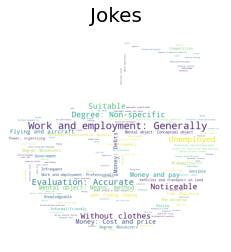

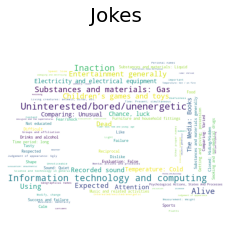

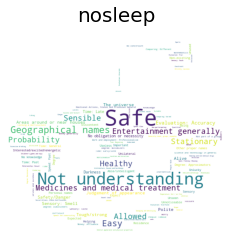

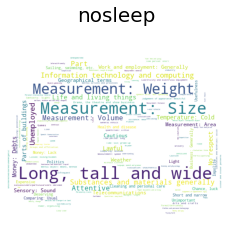

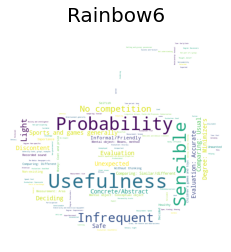

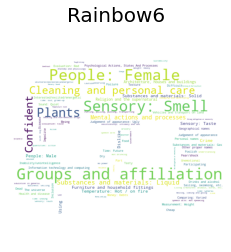

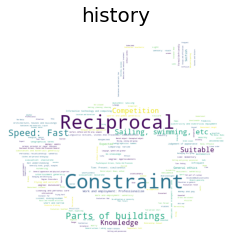

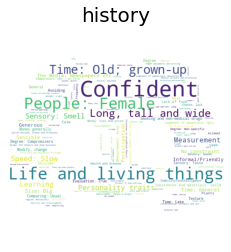

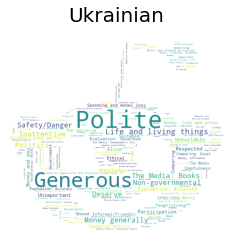

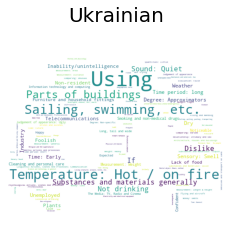

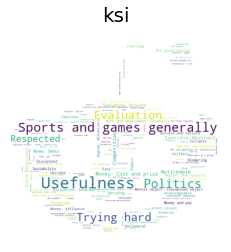

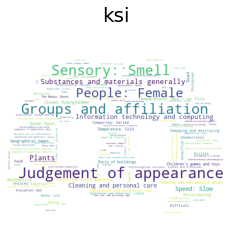

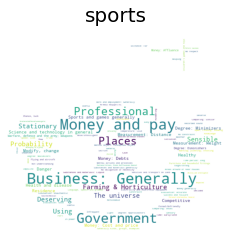

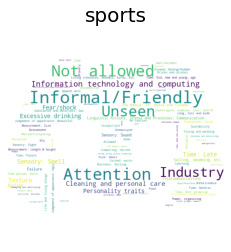

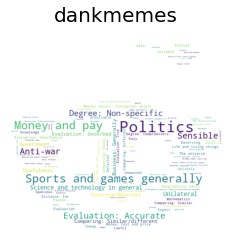

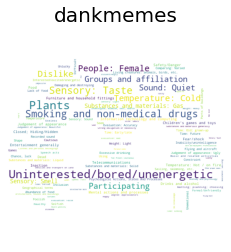

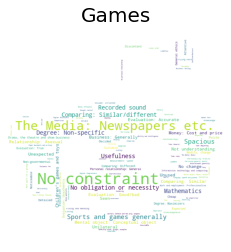

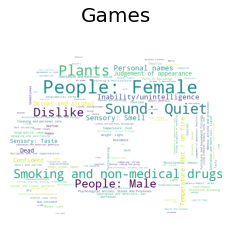

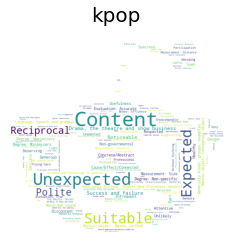

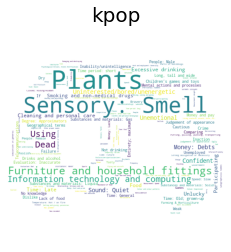

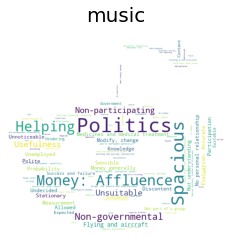

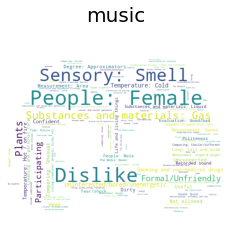

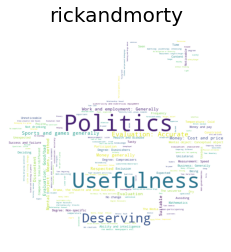

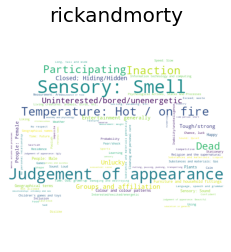

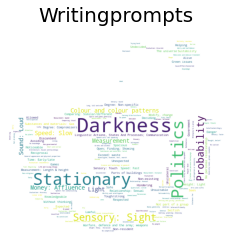

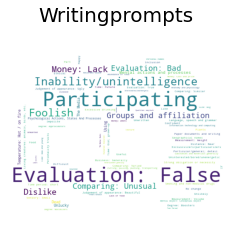

time: 2min 49s (started: 2022-11-30 13:55:31 +00:00)


In [ ]:
for community_x in community_names:

  merged_data = pd.read_excel(my_dir+f'Datasets/Clustered_Data/{community_x}_clustered.xlsx')

  merged_data['USAS_Tags_cleaned']=merged_data['USAS_Tags'].map(tag_cleaner)
  merged_data['USAS_Tags_Counter']=merged_data['USAS_Tags_cleaned'].map(lambda x: Counter(x.split(' ')))


  platforms_info = merged_data.groupby('platform', as_index=False)['USAS_Tags_Counter'].sum().set_index('platform')#.reset_index()#.to_dict()
  platforms_info['USAS_Tags_Counter'] = platforms_info['USAS_Tags_Counter'].apply(lambda x: counter_updator(counter_x = x, counter_base = base_tags_counter))

  platforms_info['USAS_Description_Dict'] = platforms_info['USAS_Tags_Counter'].apply(lambda x: get_description_key(tags_dict_x = x))


  reddit_tags = platforms_info['USAS_Description_Dict']['reddit']
  discord_tags = platforms_info['USAS_Description_Dict']['discord']

  reddit_tags=pd.DataFrame.from_dict(reddit_tags, orient='index').reset_index().rename({'index':'tag',0:'freq'},axis=1)
  discord_tags=pd.DataFrame.from_dict(discord_tags, orient='index').reset_index().rename({'index':'tag',0:'freq'},axis=1)

  reddit_tags['freq_pr'] = reddit_tags['freq'].replace(0, np.nan, inplace=False).rank(pct = True, na_option='keep').replace(np.nan,0, inplace=False)
  discord_tags['freq_pr'] = discord_tags['freq'].replace(0, np.nan, inplace=False).rank(pct = True, na_option='keep').replace(np.nan,0, inplace=False)

  tags_diff = pd.DataFrame()
  tags_diff['tag']=reddit_tags['tag']
  tags_diff['freq_pr_diff']=reddit_tags['freq_pr']-discord_tags['freq_pr']

  tags_diff.to_excel(my_dir+f'Datasets/Tags_differences/{community_x}_tags_diff.xlsx')

  reddit_tags = tags_diff[tags_diff['freq_pr_diff']>0]
  discord_tags = tags_diff[tags_diff['freq_pr_diff']<0]
  discord_tags['freq_pr_diff']=discord_tags['freq_pr_diff']*-1
  reddit_tags = dict(zip(reddit_tags['tag'],reddit_tags['freq_pr_diff']))
  discord_tags = dict(zip(discord_tags['tag'],discord_tags['freq_pr_diff']))


  reddit_wordcloud = WordCloud(background_color="white",mask=reddit_mask,random_state=1)
  discord_wordcloud = WordCloud(background_color="white",mask=discord_mask,random_state=1)
  my_reddit_wordcloud = reddit_wordcloud.generate_from_frequencies(reddit_tags)
  my_discord_wordcloud = discord_wordcloud.generate_from_frequencies(discord_tags)


  plt.figure()
  plt.title(community_x,fontsize=20)
  plt.imshow(my_reddit_wordcloud)
  plt.axis("off")
  plt.savefig(my_dir+"Charts/WordClouds/{}_reddit.png".format(community_x), format="png", dpi=300)
  plt.show()

  plt.figure()
  plt.title(community_x,fontsize=20)
  plt.imshow(my_discord_wordcloud)
  plt.axis("off")
  plt.savefig(my_dir+"Charts/WordClouds/{}_discord.png".format(community_x), format="png", dpi=300)
  plt.show()

# Tags' Difference Significance

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import imageio

reddit_mask = imageio.imread(my_dir+'Charts/Reddit Mask.png')
discord_mask = imageio.imread(my_dir+'Charts/Discord Mask.png')

time: 1.33 ms (started: 2022-11-30 14:25:20 +00:00)


In [ ]:
tags_df = pd.DataFrame()
community_x='Writingprompts'
tags_df = pd.read_excel(my_dir+f'Datasets/Tags_differences/{community_x}_tags_diff.xlsx')[['tag']]

time: 60.4 ms (started: 2022-11-30 14:28:19 +00:00)


In [ ]:
tags_df['diff_arr'] = [[]] * tags_df.shape[0]
tags_df['diff_arr'] = tags_df['diff_arr'].apply(lambda x: np.asarray(x))

time: 4.06 ms (started: 2022-11-30 14:38:30 +00:00)


In [ ]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']

time: 1.2 ms (started: 2022-11-30 14:39:25 +00:00)


In [ ]:
for community_x in community_names:
  community_x_df = pd.read_excel(my_dir+f'Datasets/Tags_differences/{community_x}_tags_diff.xlsx')
  community_x_df.set_index('tag',inplace=True)
  tags_df['diff_arr'] = tags_df.apply(lambda x: np.append(x['diff_arr'],community_x_df['freq_pr_diff'][x['tag']]),axis=1)


  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

time: 2.18 s (started: 2022-11-30 14:53:51 +00:00)


In [ ]:
import scipy.stats as st
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

time: 1.64 ms (started: 2022-11-30 15:15:29 +00:00)


In [ ]:
tags_df[['mean','LB','UB']] = tags_df['diff_arr'].apply(lambda x: pd.Series(mean_confidence_interval(x)))

time: 232 ms (started: 2022-11-30 15:16:53 +00:00)


In [ ]:
tags_df.to_excel(my_dir+f'Datasets/Tags_differences/all_tags_diff.xlsx')

time: 210 ms (started: 2022-11-30 15:24:03 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


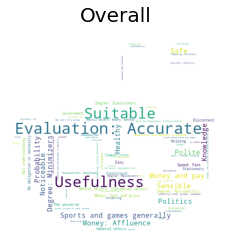

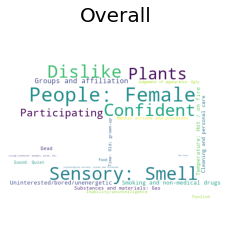

time: 3.22 s (started: 2022-11-30 15:26:31 +00:00)


In [ ]:
reddit_tags = tags_df[(tags_df['mean']>0) & (tags_df['LB']>0)]
discord_tags = tags_df[(tags_df['mean']<0) & (tags_df['UB']<0)]
discord_tags['mean']=discord_tags['mean']*-1
reddit_tags = dict(zip(reddit_tags['tag'],reddit_tags['mean']))
discord_tags = dict(zip(discord_tags['tag'],discord_tags['mean']))


reddit_wordcloud = WordCloud(background_color="white",mask=reddit_mask,random_state=1)
discord_wordcloud = WordCloud(background_color="white",mask=discord_mask,random_state=1)
my_reddit_wordcloud = reddit_wordcloud.generate_from_frequencies(reddit_tags)
my_discord_wordcloud = discord_wordcloud.generate_from_frequencies(discord_tags)


plt.figure()
plt.title('Overall',fontsize=20)
plt.imshow(my_reddit_wordcloud)
plt.axis("off")
plt.savefig(my_dir+"Charts/WordClouds/all_reddit.png", format="png", dpi=300)
plt.show()

plt.figure()
plt.title('Overall',fontsize=20)
plt.imshow(my_discord_wordcloud)
plt.axis("off")
plt.savefig(my_dir+"Charts/WordClouds/all_discord.png", format="png", dpi=300)
plt.show()